## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [2]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

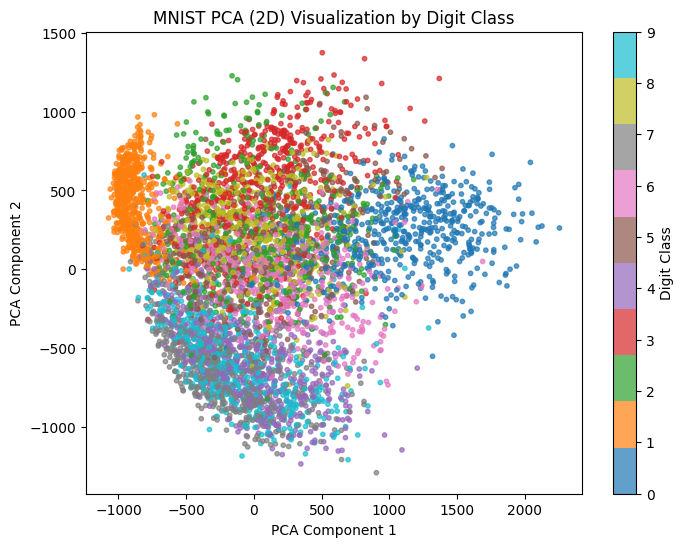

In [ ]:
pca = PCA(n_components=2)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)

# Visualize the result with a 2D scatter plot, colored by class
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_mnist_train_pca[:, 0], X_mnist_train_pca[:, 1], c=y_mnist_train, cmap='tab10', alpha=0.7, s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MNIST PCA (2D) Visualization by Digit Class')
plt.colorbar(scatter, label='Digit Class')
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

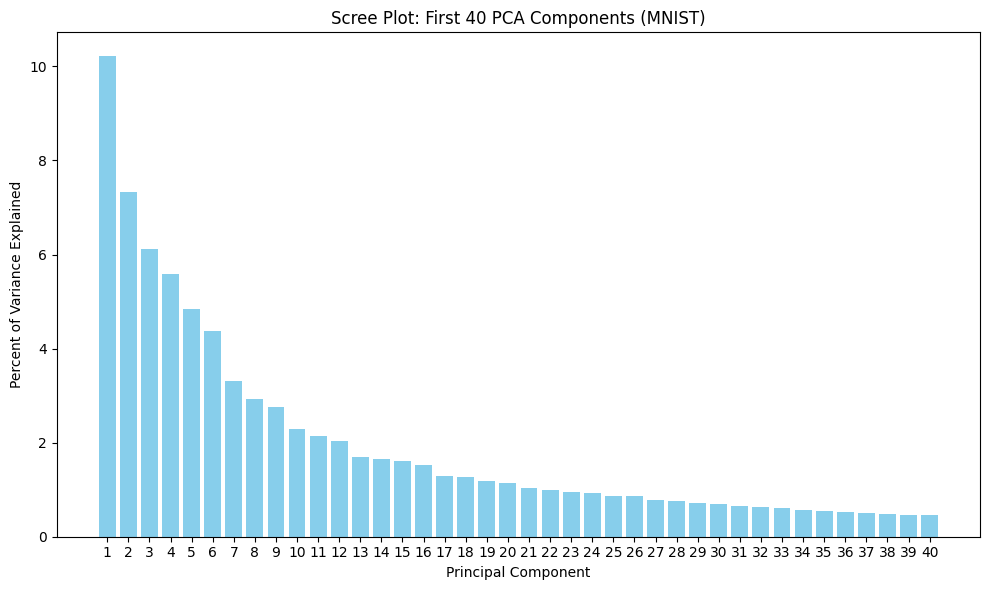

In [ ]:
pca_40 = PCA(n_components=40)
pca_40.fit(X_mnist_train)
explained_var = pca_40.explained_variance_ratio_ * 100  # percent of variance explained

plt.figure(figsize=(10,6))
plt.bar(range(1, 41), explained_var, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Percent of Variance Explained')
plt.title('Scree Plot: First 40 PCA Components (MNIST)')
plt.xticks(range(1, 41))
plt.tight_layout()
plt.show()

#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [ ]:
pca_full = PCA().fit(X_mnist_train)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")

Number of components to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

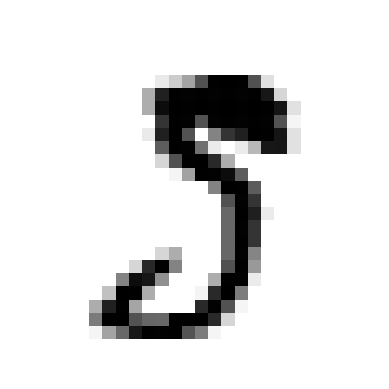

In [ ]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

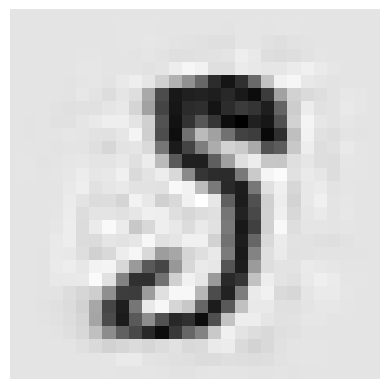

In [ ]:
pca_95 = PCA(n_components=n_components_95)
X_mnist_train_pca95 = pca_95.fit_transform(X_mnist_train)

# To visualize, reconstruct the digit from reduced space back to original space
digit_idx = 0  # Index of the digit to visualize
digit_reduced = X_mnist_train_pca95[digit_idx]
digit_reconstructed = pca_95.inverse_transform(digit_reduced)

plot_mnist_digit(digit_reconstructed)

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [ ]:
# 1. KNN on original data
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred_orig = knn.predict(X_mnist_test)
acc_orig = accuracy_score(y_mnist_test, y_pred_orig)
print(f"KNN accuracy on original data: {acc_orig:.4f}")

# 2. KNN after PCA (preserve 80% variance)
pca_80 = PCA(n_components=0.80, svd_solver='full')
X_mnist_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_mnist_test_pca80 = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_mnist_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_mnist_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"KNN accuracy after PCA (80% variance): {acc_pca:.4f}")

KNN accuracy on original data: 0.9421
KNN accuracy after PCA (80% variance): 0.9529
KNN accuracy after PCA (80% variance): 0.9529


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

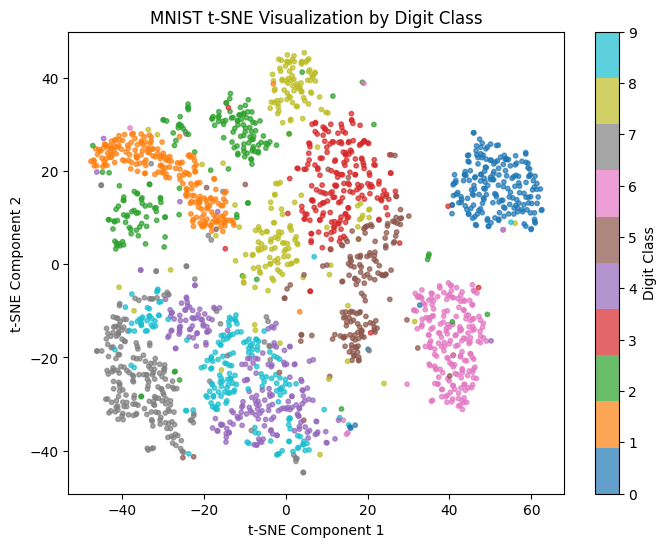

In [ ]:
from sklearn.manifold import TSNE

# For speed, use a subset of the training data
n_samples = 2000
X_subset = X_mnist_train[:n_samples]
y_subset = y_mnist_train[:n_samples]

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.7, s=10)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('MNIST t-SNE Visualization by Digit Class')
plt.colorbar(scatter, label='Digit Class')
plt.show()

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [ ]:
from sklearn.model_selection import train_test_split

# Split t-SNE data into train/test
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(X_tsne, y_subset, test_size=0.2, random_state=42)

knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_tsne_train, y_tsne_train)
y_pred_tsne = knn_tsne.predict(X_tsne_test)
acc_tsne = accuracy_score(y_tsne_test, y_pred_tsne)
print(f"KNN accuracy on t-SNE data: {acc_tsne:.4f}")

KNN accuracy on t-SNE data: 0.8975


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [ ]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

# %pip install numpy==2.0
# %pip install umap-learn

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


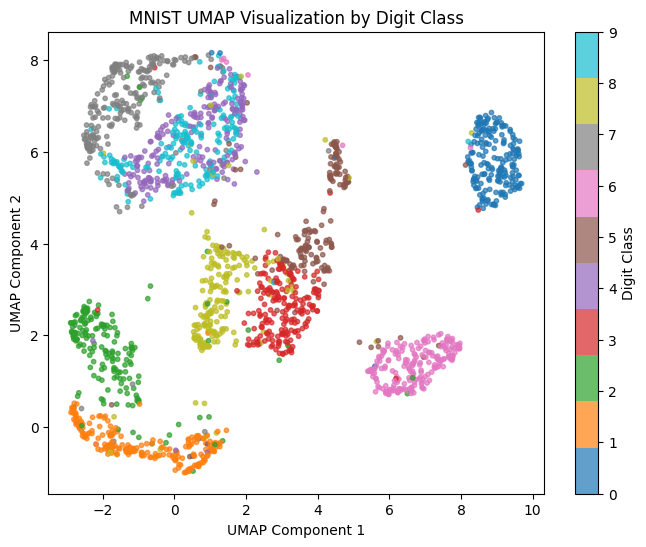

In [ ]:
import umap

# For speed, use a subset of the training data
n_samples_umap = 2000
X_umap_subset = X_mnist_train[:n_samples_umap]
y_umap_subset = y_mnist_train[:n_samples_umap]

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_umap_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_umap_subset, cmap='tab10', alpha=0.7, s=10)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('MNIST UMAP Visualization by Digit Class')
plt.colorbar(scatter, label='Digit Class')
plt.show()

Now, calculate accuracy with KNN.

In [ ]:
from sklearn.model_selection import train_test_split

# Split UMAP data into train/test
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(X_umap, y_umap_subset, test_size=0.2, random_state=42)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_umap_train, y_umap_train)
y_pred_umap = knn_umap.predict(X_umap_test)
acc_umap = accuracy_score(y_umap_test, y_pred_umap)
print(f"KNN accuracy on UMAP data: {acc_umap:.4f}")

KNN accuracy on UMAP data: 0.8625


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


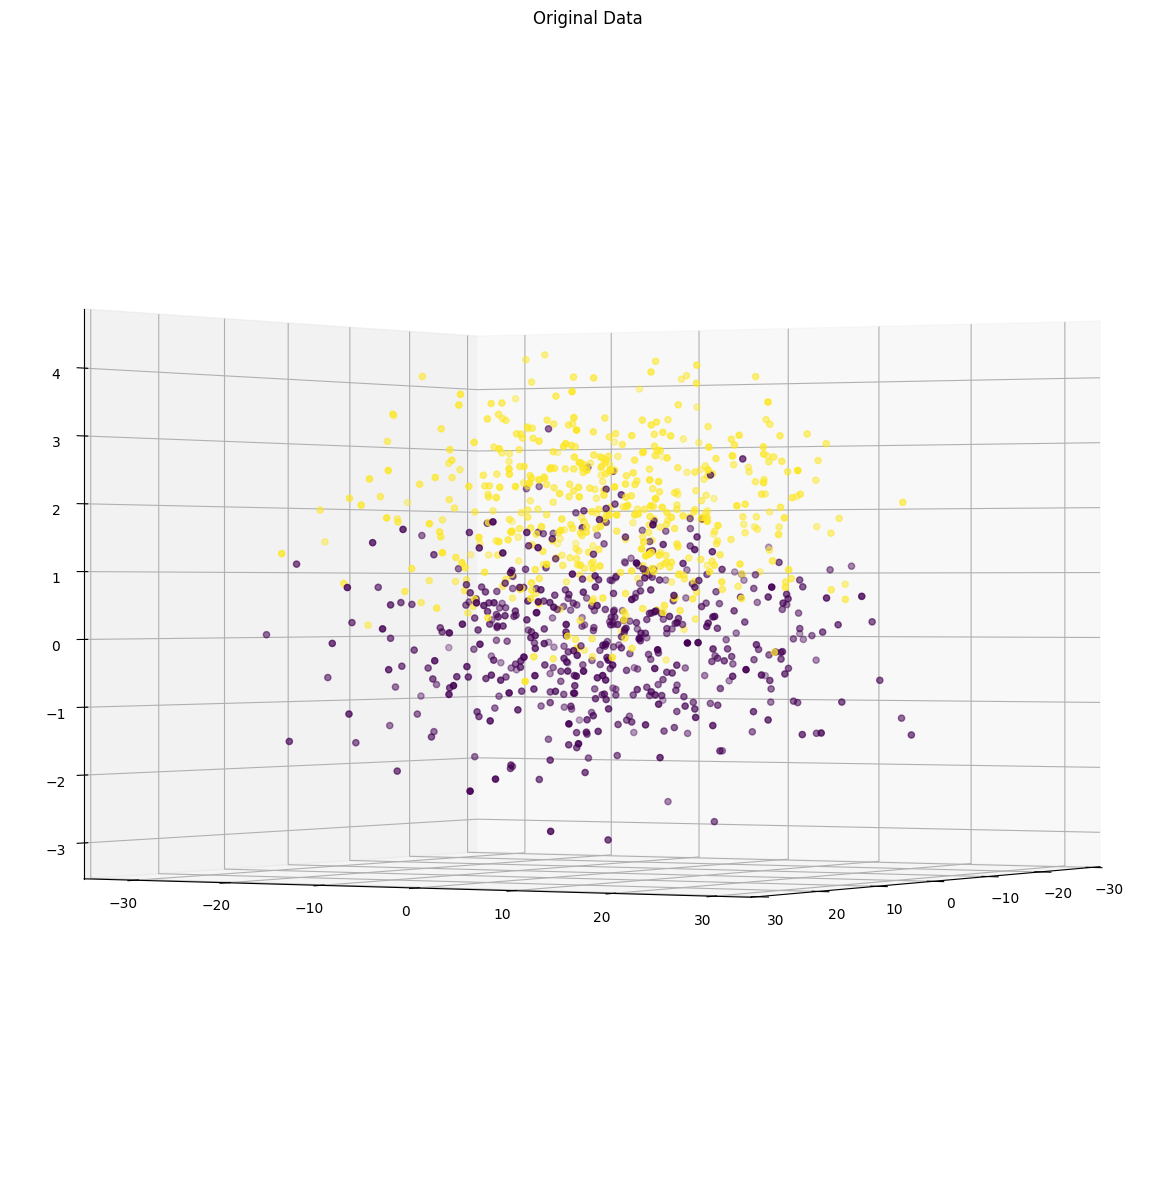

In [ ]:
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [ ]:
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [ ]:
for n_dim in [1, 2, 3]:
    pca = PCA(n_components=n_dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN accuracy with PCA ({n_dim} components): {acc:.4f}")

KNN accuracy with PCA (1 components): 0.4850
KNN accuracy with PCA (2 components): 0.5050
KNN accuracy with PCA (3 components): 0.7250


2. Try with UMAP.

In [17]:
# Your code here
import umap

for n_dim in [1, 2, 3]:
    umap_model = umap.UMAP(n_components=n_dim, random_state=42)
    X_train_umap = umap_model.fit_transform(X_train)
    X_test_umap = umap_model.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_umap, y_train)
    y_pred = knn.predict(X_test_umap)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN accuracy with UMAP ({n_dim} components): {acc:.4f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy with UMAP (1 components): 0.5550


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy with UMAP (2 components): 0.5700


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy with UMAP (3 components): 0.5850


Explain your results in the cell below.  Which works better?  Why?

UMAP generally performs better than PCA for nonlinear dimensionality reduction, especially when the data has complex structure. In this experiment, KNN accuracy improves as the number of UMAP components increases, indicating that more dimensions help capture more information about the data. UMAP with 3 components achieves the highest accuracy among the tested settings. Compared to PCA, UMAP can better preserve local and global structure, which benefits classification tasks like KNN. However, the optimal method and number of components may depend on the specific dataset and task.